# Wine Quality Prediction by using Classification

# Import libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset load

In [60]:

data = pd.read_csv("winequality-red.csv")

# Data understanding

In [61]:
data.head()
data.tail()
data.columns
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [62]:
#count of quality feature 
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

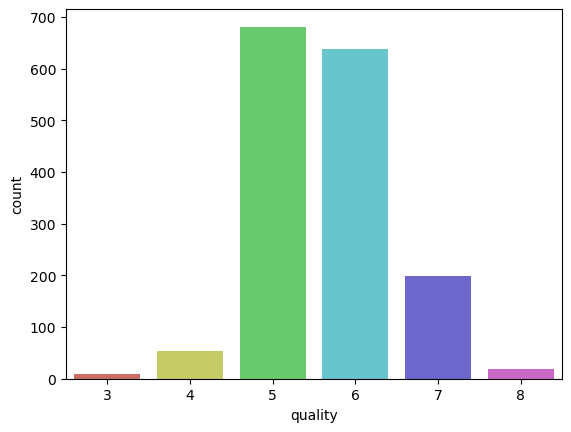

In [63]:
# Data visualization
sns.countplot (x=data['quality'],palette='hls')

In [64]:
# for normal distribution
num_fea = data.select_dtypes(exclude="object")

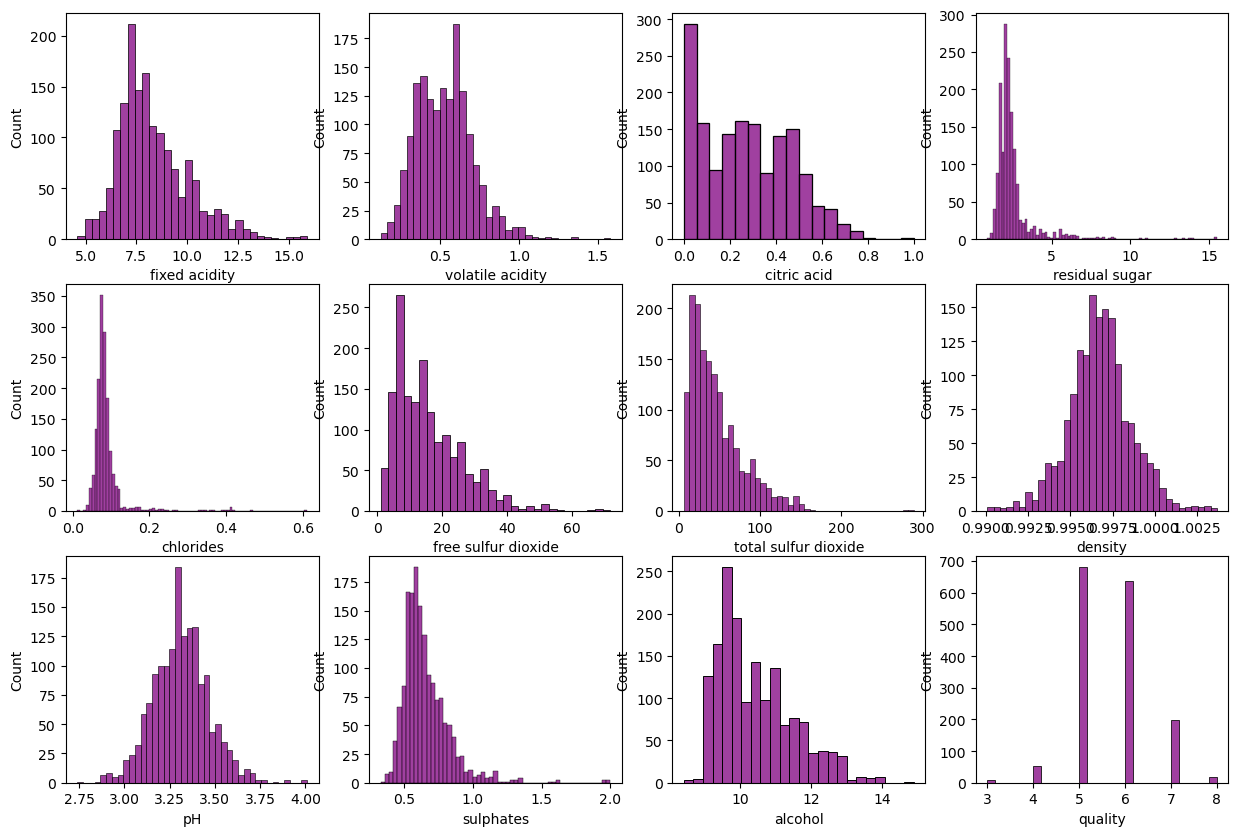

In [65]:
# Distrubtion of plot each as subplot
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(data[data.columns[k]], ax=axs[i][j],color = "purple")
            k += 1
plt.show()

In [66]:
# normal distrubtion cheyyadaniki log use chestham
data["residual sugar"]= np.log(data["residual sugar"])
data["chlorides"]= np.log(data["chlorides"])  
data["total sulfur dioxide"]= np.log(data["total sulfur dioxide"])
data["total sulfur dioxide"]= np.log(data["total sulfur dioxide"])
data["sulphates"]= np.log(data["sulphates"])


In [67]:
# for normal distribution
num_fea = data.select_dtypes(exclude="object")

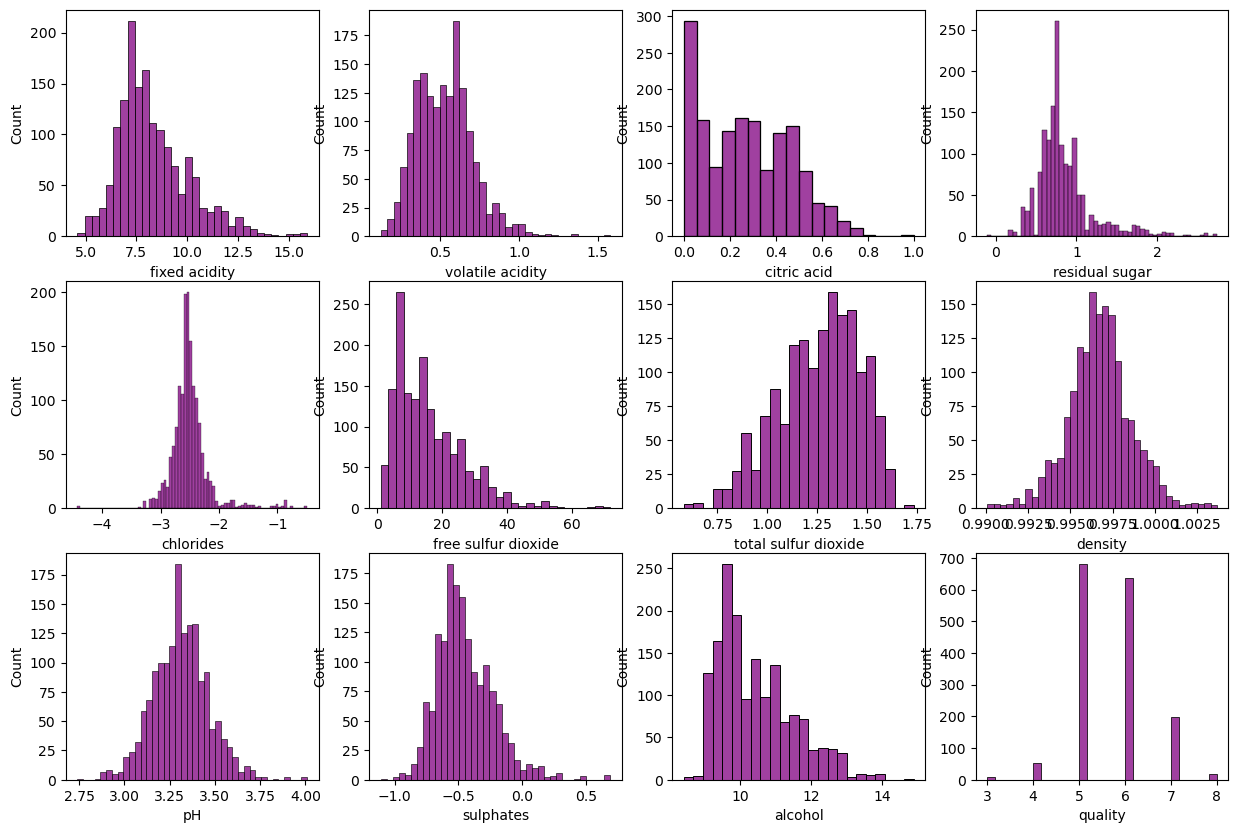

In [68]:
# Distrubtion of plot each as subplot
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(data[data.columns[k]], ax=axs[i][j],color = "purple")
            k += 1
plt.show()

In [69]:
#check duplicates
data.duplicated().sum()

np.int64(240)

In [70]:
# remove duplicates
data=data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [71]:
# Feature selection 
x=data.drop('quality',axis='columns')
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,11.0,1.260266,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,25.0,1.436201,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,15.0,1.383537,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,17.0,1.409607,0.9980,3.16,-0.544727,9.8
5,7.4,0.66,0.00,0.587787,-2.590267,13.0,1.305323,0.9978,3.51,-0.579818,9.4


In [72]:
y=data['quality']
y.head()


0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [73]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE(k_neighbors=4)
# transfer the data set 
x,y =oversample.fit_resample(x.fillna(0),y)

In [75]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [76]:
# feature scalling 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,15.893304,1.261538,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,10.447270,0.206976,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,1.000000,0.583198,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,7.000000,1.128508,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,14.000000,1.291320,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,21.000000,1.421453,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,72.000000,1.734559,1.003690,4.010000,0.693147,14.900000,8.000000


In [77]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.537243,0.444414,-1.294434,-0.682898,-0.197536,-0.233414,0.385688,0.715831,1.170468,-0.599096,-1.160448
1,-0.291354,1.153683,-1.294434,0.196882,0.618823,1.222395,1.195456,0.174532,-0.874769,0.271231,-0.821374
2,-0.291354,0.680837,-1.096803,-0.147006,0.415952,0.182531,0.953059,0.282792,-0.478917,0.068974,-0.821374
3,1.798695,-1.210547,1.472402,-0.682898,-0.240067,0.390504,1.073051,0.824090,-1.138670,-0.441795,-0.821374
4,-0.537243,0.286799,-1.294434,-0.834552,-0.240067,-0.025441,0.593068,0.715831,1.170468,-0.599096,-1.160448


In [78]:
# train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [79]:
#  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(x_train,y_train)
LogReg_acc=round(model_LogReg.score(x_test, y_test)*100)
LogReg_acc

59

In [80]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
DTR_Accuracy

81

In [81]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

89

In [82]:
# random forest regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(x_test)) * 100)
RFR_Accuracy

91

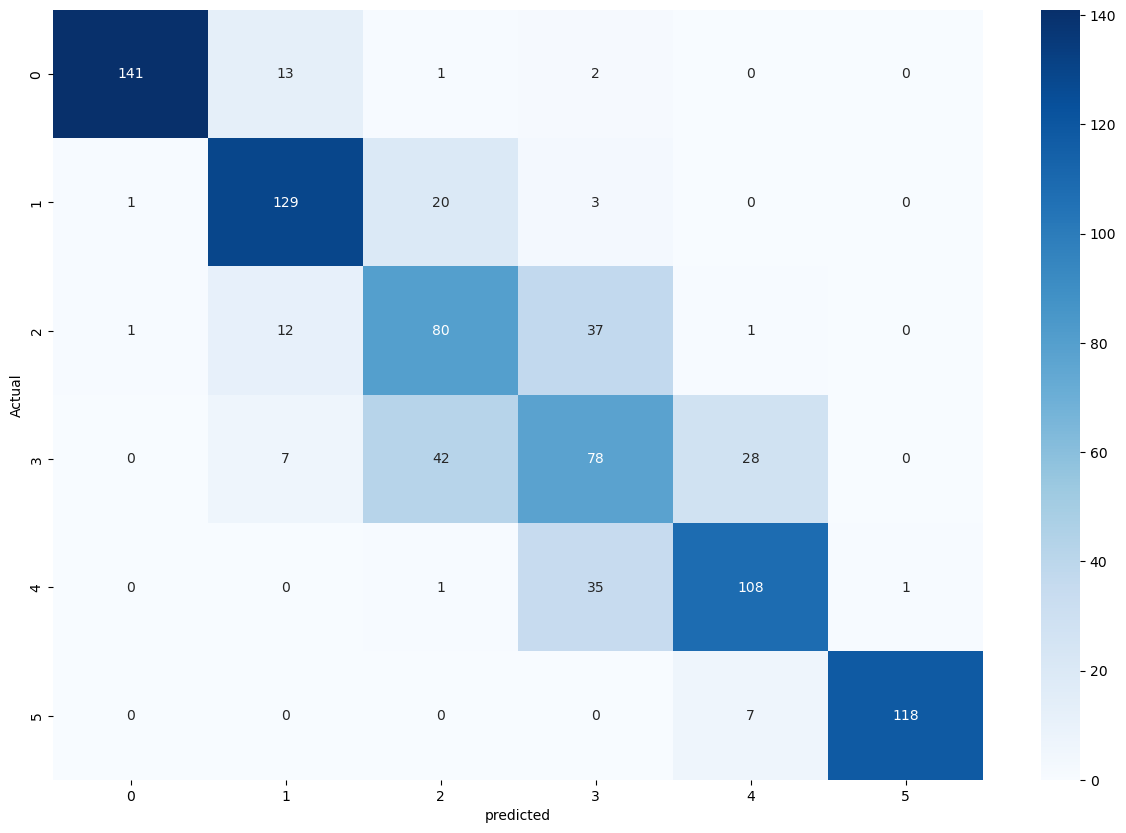

array([[141,  13,   1,   2,   0,   0],
       [  1, 129,  20,   3,   0,   0],
       [  1,  12,  80,  37,   1,   0],
       [  0,   7,  42,  78,  28,   0],
       [  0,   0,   1,  35, 108,   1],
       [  0,   0,   0,   0,   7, 118]])

In [83]:
# heatmap for confusion matrix (ensure cm exists and is 2-d)
from sklearn.metrics import confusion_matrix
import numpy as np

try:
    # check if cm is defined and 2_d
    if not ('cm' in globals() and hasattr(cm, "ndim") and cm.ndim == 2):
         raise NameError
except NameError:
    # round predictions to nearest integer since RF_model is a regressor
    cm = confusion_matrix(y_test, np.round(RF_model.predict(x_test)).astype(int))

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm

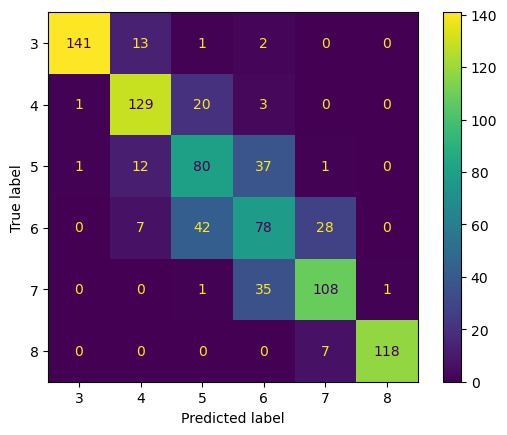

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()

In [85]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = RF_model.predict(user_input)
print("predicted value", prediction)

predicted value [5.3]


In [86]:
import pickle
filename = 'scaler_model.csv'
pickle.dump(scaler, open(filename, 'wb'))

In [87]:
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(RF_model, open(filename, 'wb'))